In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv('student/student-mat.csv', delimiter=';')
df2 = pd.read_csv('student/student-por.csv', delimiter=';')
df1['subject'] = 'math'
df2['subject'] = 'por'
df_inner = pd.merge(df1, df2,how='inner', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
df_outer = pd.merge(df1, df2,how='outer', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
df_all = pd.concat([df1,df2])

# Praca domowa 1
*Paweł Wojciechowski*


## Czy matematyka jest trudniejsza dla uczniów?

**Hipoteza:** *Matematyka jest trudniejsza dla uczniów.*

In [3]:
df_inner['better_at_math'] = df_inner['G3_x'] > df_inner['G3_y']

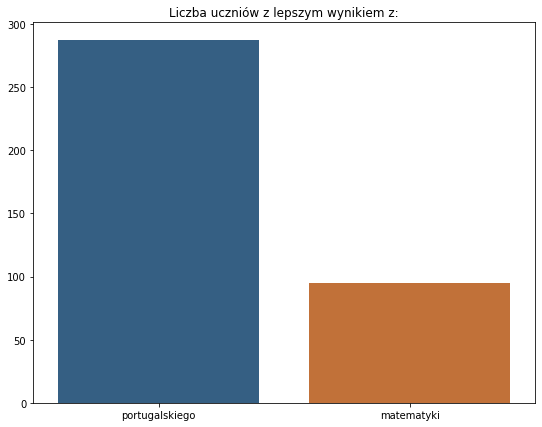

In [4]:
fig, ax = plt.subplots(figsize=(9,7))
g = sns.countplot(data=df_inner, x='better_at_math',palette=['#286090', '#D86D22'])
plt.title('Liczba uczniów z lepszym wynikiem z:')
g.set_xticklabels(['portugalskiego', 'matematyki'])
g.set(xlabel=None)
g.set(ylabel=None)
plt.show()

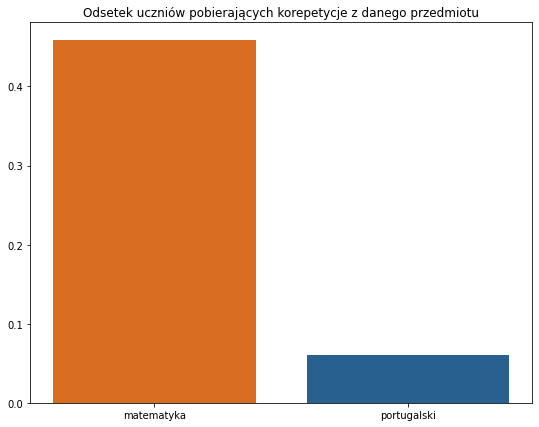

In [5]:
fig, ax = plt.subplots(figsize=(9,7))
percentage_math = df1[df1['paid']=='yes'].shape[0]/df1.shape[0]
percentage_por = df2[df2['paid']=='yes'].shape[0]/df2.shape[0]
percentage_math, percentage_por

plt.bar(['matematyka', 'portugalski'], [percentage_math, percentage_por], color=['#D86D22','#286090'])
plt.title('Odsetek uczniów pobierających korepetycje z danego przedmiotu')
plt.show()

Wśród uczniów o których mamy informacje o obu przedmiotach, większość zdobyła lepszy wynik z języka portugalskiego niż matematyki. Również więcej uczniów bierze korepetycje z matematyki niż z j. portugalskiego. Można podejrzewać, że hipoteza jest prawdziwa.

## Czy bycie w związku wpływa na wyniki?

**Hipoteza:** *Uczniowie będący w związku mają nieco gorsze wyniki w nauce.*

Średnia wyników w nauce, rożni się nieco pomiędzy osobami w związku i bez. t-test (zakładając próg p<0.05) również wskazuje, że bycie w związku jest statystycznie znaczące dla wyników w nauce (zwłaszcza w matematyce).

In [6]:
print('matematyka')
df1.groupby('romantic')['G3'].mean()

matematyka


romantic
no     10.836502
yes     9.575758
Name: G3, dtype: float64

In [7]:
print('j. portugalski')
df2.groupby('romantic')['G3'].mean()

j. portugalski


romantic
no     12.129268
yes    11.523013
Name: G3, dtype: float64

In [8]:
from scipy.stats import ttest_ind
print('matematyka: ',ttest_ind(df1.loc[df1['romantic']=='yes', 'G3'], df1.loc[df1['romantic']=='no', 'G3']))
print('j. portugalski: ',ttest_ind(df2.loc[df2['romantic']=='yes', 'G3'], df2.loc[df2['romantic']=='no', 'G3']))


matematyka:  Ttest_indResult(statistic=-2.598595332345276, pvalue=0.009712726394119265)
j. portugalski:  Ttest_indResult(statistic=-2.3135952370325024, pvalue=0.021002471524651137)


Spójrzmy jeszcze na wykresy rozkładu. Widać że czętość wyniku 0 z matematyki jest bardzo duża dla osób w związku w porównaniu do pozostałej częsci wykresu.

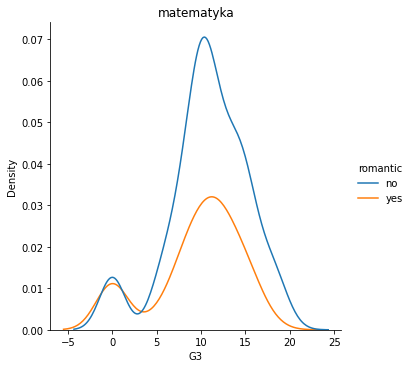

In [9]:
#fig, ax = plt.subplots(figsize=(9,7))
sns.displot(data=df1, x='G3', hue='romantic', kind='kde')
plt.title('matematyka')
plt.show()

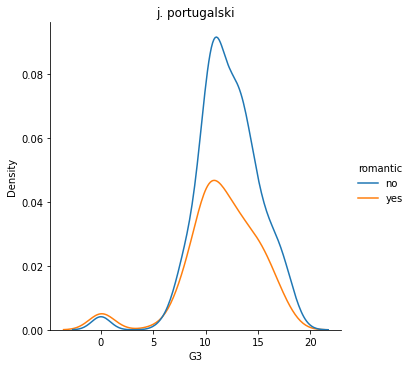

In [10]:
sns.displot(data=df2, x='G3', hue='romantic', kind='kde')
plt.title('j. portugalski')
plt.show()

Po odrzuceniu najgorszych wyników, dla matematyki p wzrosło do 0.34, więc to ta koncentracja przy wyniku 0 dawała niską wartość p dla matematyki. Natomiast dla j. portugalskiego p utrzymało się poniżej 0.05. Tak więc można podejrzewać że hipoteza jest prawdziwa.

In [11]:
print('matematyka: ',ttest_ind(df1.loc[(df1['romantic']=='yes')&(df1['G3']>2), 'G3'], df1.loc[(df1['romantic']=='no')&(df1['G3']>2), 'G3']))
print('j. portugalski: ',ttest_ind(df1.loc[(df2['romantic']=='yes')&(df2['G3']>2), 'G3'], df1.loc[(df2['romantic']=='no')&(df2['G3']>2), 'G3']))

matematyka:  Ttest_indResult(statistic=-0.9421847680214219, pvalue=0.34673876744026566)
j. portugalski:  Ttest_indResult(statistic=-2.31922309804873, pvalue=0.02089755536010051)


## Czy spożycie alkoholu wiąże się z liczbą nieobecności?
**Hipoteza:** *Większe spożycie w ciągu tygodnia alkoholu wiąże się z większą liczbą nieobecności w szkole.*

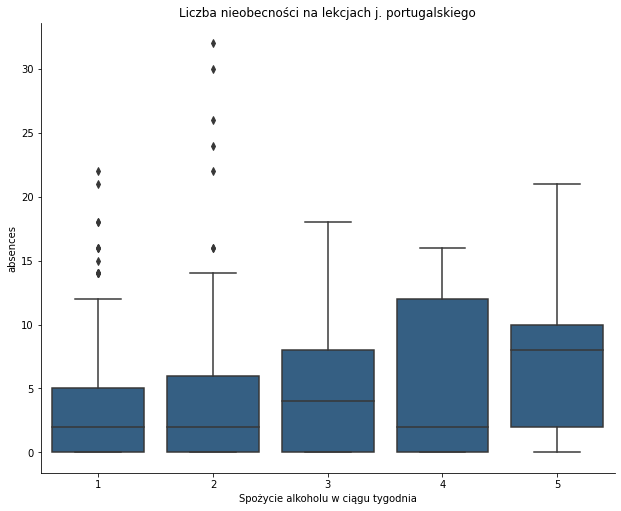

In [12]:
g = sns.catplot(data=df2, x='Dalc', y='absences', kind='box', color='#286090')
g.fig.set_size_inches(9,7)
plt.title('Liczba nieobecności na lekcjach j. portugalskiego')
plt.xlabel('Spożycie alkoholu w ciągu tygodnia')
plt.show()

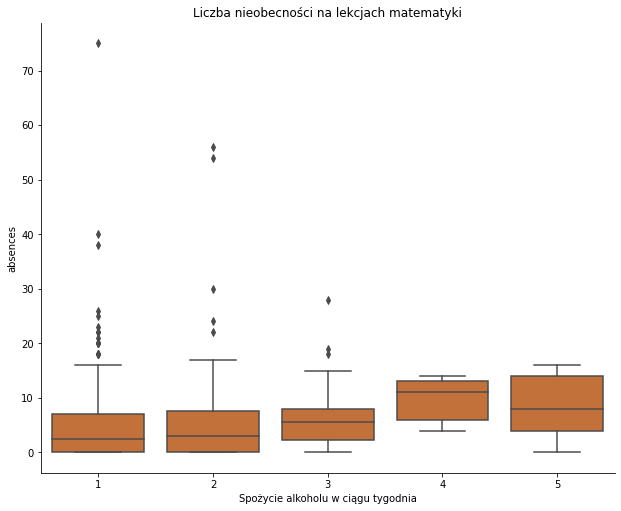

In [13]:
g = sns.catplot(data=df1, x='Dalc', y='absences', kind='box', color='#D86D22')
g.fig.set_size_inches(9,7)
plt.title('Liczba nieobecności na lekcjach matematyki')
plt.xlabel('Spożycie alkoholu w ciągu tygodnia')
plt.show()

Widać, że uczniowie spożywający więcej alkoholu w ciągu tygodnia mają więcej nieobecności na lekcji. Widać to zwłaszcza na lekcjach języka portugalskiego.

## Czy spożycie alkoholu wpływa na zdrowie?
**Hipoteza:** *Spozycie alkoholu negatywnie wpływa na zdrowie.*

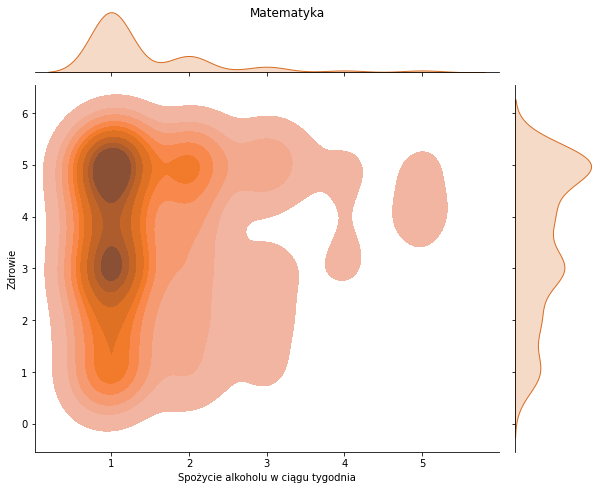

In [14]:
g = sns.jointplot(data=df1, x="Dalc", y="health",kind="kde", fill=True, color='#D86D22')
g.fig.set_size_inches(9,7)
g.fig.suptitle('Matematyka')
g.ax_joint.set_xlabel('Spożycie alkoholu w ciągu tygodnia')
g.ax_joint.set_ylabel('Zdrowie')
plt.show()

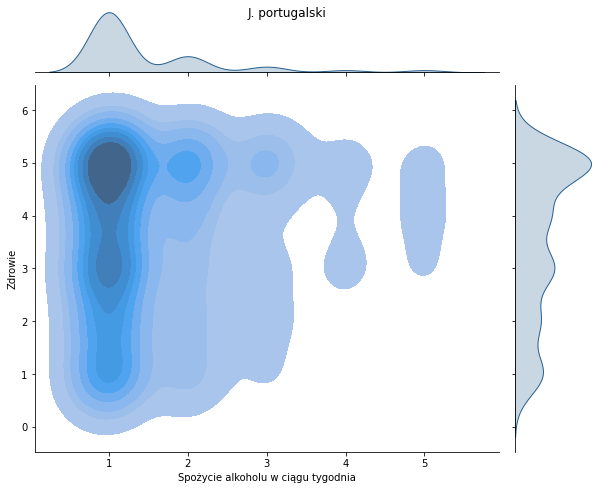

In [15]:
g = sns.jointplot(data=df2, x="Dalc", y="health",kind="kde", fill=True, color='#286090')
g.fig.set_size_inches(9,7)
g.fig.suptitle('J. portugalski')
g.ax_joint.set_xlabel('Spożycie alkoholu w ciągu tygodnia')
g.ax_joint.set_ylabel('Zdrowie')
plt.show()

Wbrew przewidywaniom, uczniowie spożywający najwiecej alkoholu, zaznaczali odpowiedzi w górnej części skali dotyczącej zdrowia.

## Czy uczniowie apsirujący na studia lepiej poprawiają oceny?
**Hipoteza:** *Uczniowie planujący iść na studia, po uzyskaniu gorszej oceny w pierwszym terminie, lepiej poprawiają ocenę niż ci, którzy nie planują iść na studia.*

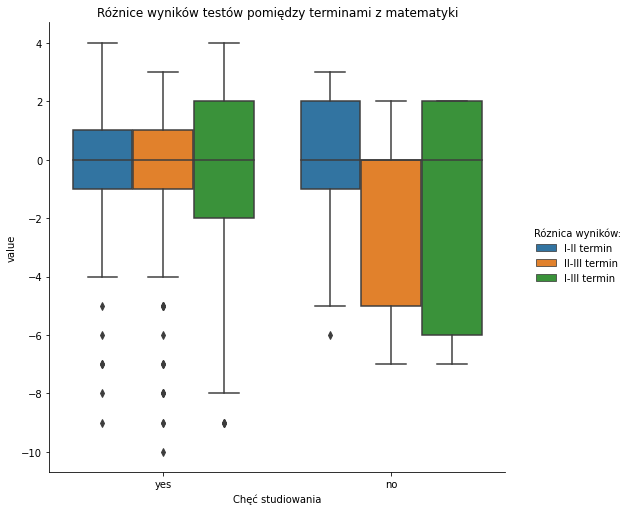

In [16]:
# liczymy różnicę pomiędzy wynikami kolejnych testów
df_all['delta2'] = df_all['G2'] - df_all['G1']
df_all['delta3'] = df_all['G3'] - df_all['G2']
df_all['delta_all'] = df_all['G3'] - df_all['G1']

x = pd.melt(df_all.loc[(df_all['subject']=='math') & (df_all['G1']<10),['higher', 'delta2', 'delta3', 'delta_all']],
            id_vars=['higher'], value_vars=['delta2', 'delta3', 'delta_all'])
g = sns.catplot(data=x, x='higher', y='value', hue='variable', kind='box')
legend = g._legend
legend.set_title("Róznica wyników:")
for t, l in zip(legend.texts,("I-II termin", "II-III termin", "I-III termin")):
    t.set_text(l)
g.fig.set_size_inches(9,7)
plt.title('Różnice wyników testów pomiędzy terminami z matematyki')
plt.xlabel('Chęć studiowania')
plt.show()

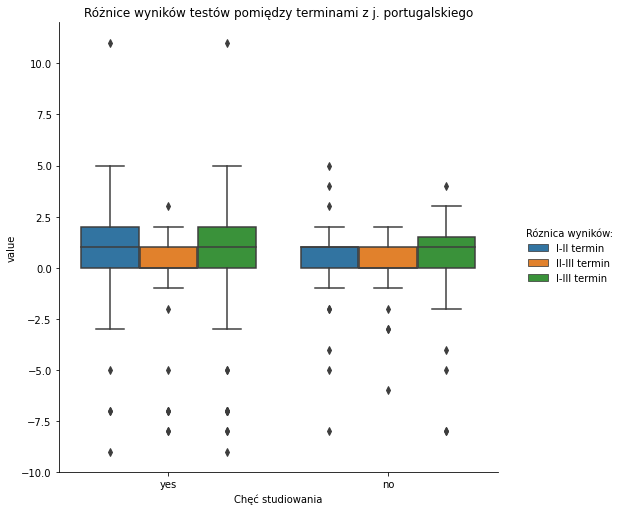

In [17]:
x = pd.melt(df_all.loc[(df_all['subject']=='por') & (df_all['G1']<10),['higher', 'delta2', 'delta3', 'delta_all']],
            id_vars=['higher'], value_vars=['delta2', 'delta3', 'delta_all'])
g = sns.catplot(data=x, x='higher', y='value', hue='variable', kind='box')
legend = g._legend
legend.set_title("Róznica wyników:")
for t, l in zip(legend.texts,("I-II termin", "II-III termin", "I-III termin")):
    t.set_text(l)
g.fig.set_size_inches(9,7)
plt.title('Różnice wyników testów pomiędzy terminami z j. portugalskiego')
plt.xlabel('Chęć studiowania')
plt.show()

Na wykresach, większość boxplotów dotyczących uczniów chcących studiować znajduje się nieco wyżej. Jednak różnica jest naprawdę mała i do tego wykresy te mają wiekszy rozrzut niż wykresy dotyczące uczniów, które nie chcą studiować.